<a href="https://colab.research.google.com/github/hvmt2003/K-NN-/blob/main/K_Nearest_Neighbour_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel('/content/Social_Network_Ads.xlsx')

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

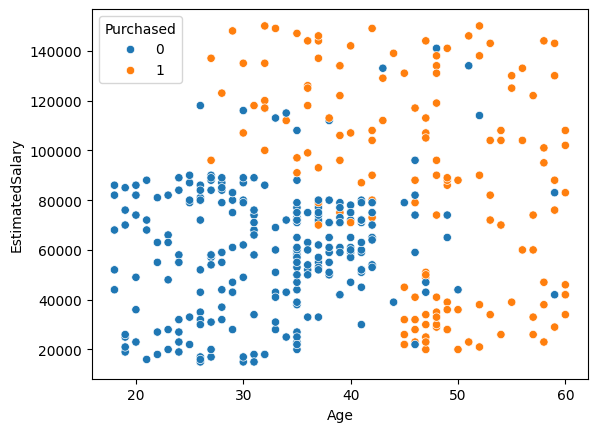

In [7]:
sns.scatterplot(data=dataset,x='Age',y='EstimatedSalary',hue='Purchased')

In [5]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [11]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [28]:
knn.score(x_test,y_test)

0.925

In [29]:
# to check overfitting
knn.score(x_train,y_train),knn.score(x_test,y_test)

(0.90625, 0.925)

In [31]:
for i in range(1,30):
  knn1=KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  print('K=',i," Train Accuracy:",knn1.score(x_train,y_train)," Test Accuracy:",knn1.score(x_test,y_test))

K= 1  Train Accuracy: 0.996875  Test Accuracy: 0.85
K= 2  Train Accuracy: 0.9125  Test Accuracy: 0.8625
K= 3  Train Accuracy: 0.925  Test Accuracy: 0.925
K= 4  Train Accuracy: 0.915625  Test Accuracy: 0.925
K= 5  Train Accuracy: 0.909375  Test Accuracy: 0.925
K= 6  Train Accuracy: 0.909375  Test Accuracy: 0.9
K= 7  Train Accuracy: 0.91875  Test Accuracy: 0.9375
K= 8  Train Accuracy: 0.90625  Test Accuracy: 0.925
K= 9  Train Accuracy: 0.9125  Test Accuracy: 0.9375
K= 10  Train Accuracy: 0.90625  Test Accuracy: 0.925
K= 11  Train Accuracy: 0.909375  Test Accuracy: 0.925
K= 12  Train Accuracy: 0.9125  Test Accuracy: 0.925
K= 13  Train Accuracy: 0.915625  Test Accuracy: 0.925
K= 14  Train Accuracy: 0.90625  Test Accuracy: 0.925
K= 15  Train Accuracy: 0.90625  Test Accuracy: 0.925
K= 16  Train Accuracy: 0.9  Test Accuracy: 0.925
K= 17  Train Accuracy: 0.903125  Test Accuracy: 0.925
K= 18  Train Accuracy: 0.9  Test Accuracy: 0.925
K= 19  Train Accuracy: 0.909375  Test Accuracy: 0.925
K= 20  

In [34]:
# k=3 lenge apan

knn.predict([[-1.781797,-1.490046]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [37]:
# predicting correct values
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


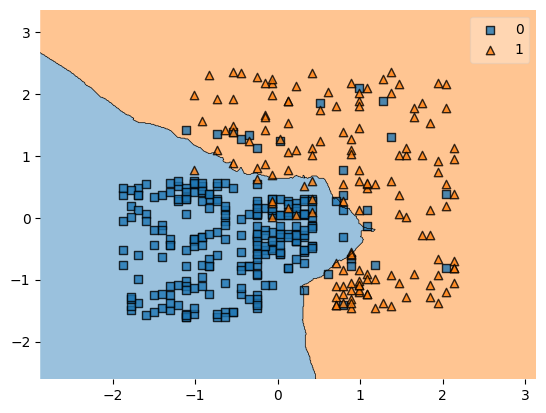

In [39]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=knn)
plt.show()